In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
from collections import Counter
from random import randint
import random
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
df=pd.read_csv('/content/hackathon.csv')
df.head()

,Name,Start Date,Role,Role Level,Vendor,Product,Prod Start Date,Prod End Date,resource product start date,resource product end date,Prod Build Location,Anchor,Work Intake Scoping,Interviewer,Security Maven,Accessibility,DevSecOps,Education Track,Location,E/C,Color (Y/N),Gender,Available for Other areas,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5
0,Resource 2,11/29/17,Engr,Senior,NaN,Product 1,01/04/21,12/24/21,01/04/21,12/24/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,NaN,Cloud,NaN,NaN,NaN
1,Resource 3,01/01/18,Engr,Senior,NaN,Product 2,01/24/21,12/24/21,01/24/21,12/24/21,AZ,Y,NaN,Y,NaN,NaN,NaN,NaN,IL,E,Y,M,N,Legacy Java,Cloud,IBM/Websphere,Angular,NaN
2,Resource 6,01/08/18,Engr,Senior,NaN,Product 3,01/31/21,12/24/21,01/31/21,12/17/21,IL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,Y,.NET,Cloud,NaN,NaN,NaN
3,Resource 7,01/08/18,Engr,Senior,NaN,Product 4,02/07/21,05/21/21,02/07/21,05/21/21,IL,Y,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,Y,F,Y,.NET,Cloud,NaN,NaN,NaN
4,Resource 8,01/08/18,Engr,Senior,NaN,Product 5,02/21/21,12/03/21,02/21/21,12/03/21,AZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,E,N,M,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['Name', 'Start Date', 'Role', 'Role Level', 'Vendor', 'Product',
       'Prod Start Date', 'Prod End Date', 'resource product start date',
       'resource product end date', 'Prod Build Location', 'Anchor',
       'Work Intake Scoping', 'Interviewer', 'Security Maven', 'Accessibility',
       'DevSecOps', 'Education Track', 'Location', 'E/C', 'Color (Y/N)',
       'Gender', 'Available for Other areas', 'Skill 1', 'Skill 2', 'Skill 3',
       'Skill 4', 'Skill 5'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         171 non-null    object 
 1   Start Date                   171 non-null    object 
 2   Role                         171 non-null    object 
 3   Role Level                   119 non-null    object 
 4   Vendor                       54 non-null     object 
 5   Product                      159 non-null    object 
 6   Prod Start Date              159 non-null    object 
 7   Prod End Date                152 non-null    object 
 8   resource product start date  159 non-null    object 
 9   resource product end date    152 non-null    object 
 10  Prod Build Location          160 non-null    object 
 11  Anchor                       24 non-null     object 
 12  Work Intake Scoping          0 non-null      float64
 13  Interviewer         

In [ ]:
df.describe()

,Work Intake Scoping,Skill 5
count,0.0,0.0
mean,NaN,NaN
std,NaN,NaN
min,NaN,NaN
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,NaN,NaN


**Gender Diversity**

In [ ]:
list(df['Gender'].unique())[:-1]

['M', 'F']

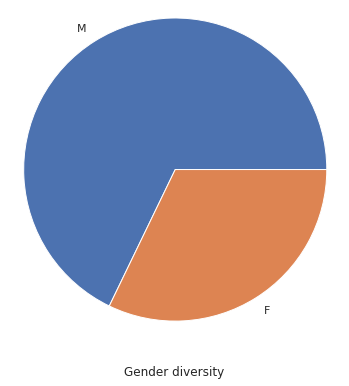

In [ ]:
plt.figure(figsize=(6,6))

Gender_df = df['Gender'].value_counts()

plt.title('Gender diversity', y=-0.15)
plt.pie(Gender_df, labels=list(df['Gender'].unique())[:-1]);
plt.axis('equal');

**Skillset of a resource**

In [ ]:
skill_columns=['Name','Skill 1', 'Skill 2', 'Skill 3', 'Skill 4', 'Skill 5']
df_skill=df[skill_columns]
df_skill.head()

,Name,Skill 1,Skill 2,Skill 3,Skill 4,Skill 5
0,Resource 2,NaN,Cloud,NaN,NaN,NaN
1,Resource 3,Legacy Java,Cloud,IBM/Websphere,Angular,NaN
2,Resource 6,.NET,Cloud,NaN,NaN,NaN
3,Resource 7,.NET,Cloud,NaN,NaN,NaN
4,Resource 8,NaN,NaN,NaN,NaN,NaN


In [1]:

resource_name = input ("Enter a Name of the resource: ")

Enter a Name of the resource: Resource 2


In [ ]:
df_skill[df_skill['Name'] == resource_name ]

**Security Maven on a product**

In [ ]:
sm_columns=['Name','Product','Security Maven']
df_sm=df[sm_columns]
df_sm.head()

In [ ]:
security_maven = input ("Enter product name: ")
security_maven=security_maven.strip()

In [ ]:
df_sm[df_sm['Product'] == security_maven ]

**PM, UX or Anchor on a Product**

In [2]:
role_columns=['Name','Product','Role','Anchor']
df_role=df[role_columns]
df_role.head()

NameError: ignored

In [ ]:
product_name = input ("Enter product name: ")
product_name=product_name.strip()

In [ ]:
df_role[df_role['Product'] == product_name ]

In [ ]:
df_role[(df_role.Product == product_name) & (df_role.Role != 'Engr')]
df_role[df_role.Role != 'Engr']

**How many contractor resources? Vendor-wise, Location-wise**

In [ ]:
f, ax = plt.subplots(figsize=(12, 10))

sns.countplot(x="Vendor", data=df[df['E/C'] == 'C' ], palette = 'GnBu')
ax.set(xlabel='Vendor', ylabel='Number of contractors',title='Count of contractors:Vendor-wise')
plt.show()

In [ ]:
plt.figure(figsize = (12, 8))

ax = sns.countplot(x='Prod Build Location', data=df[df['E/C'] == 'C' ], palette = 'Set3',order = df['Prod Build Location'].value_counts().index)
ax.set_xlabel(xlabel = 'Prod Build Location', fontsize = 14)
ax.set_ylabel(ylabel = 'Number of contractors', fontsize = 14)
ax.set_title(label = 'Count of contractors:Location-wise', fontsize = 18)
plt.show()


**What is the PM to UX to Engr ratio?**

In [ ]:
df['Role'] = df['Role'].str.strip()

In [ ]:
s=df.Role.value_counts(normalize=True,sort=False).mul(100) # mul(100) is == *100
s.index.name,s.name='Role','Ratio' #setting the name of index and series
print(s.to_frame()) #series.to_frame() returns a dataframe

**Location-wise resources – PMs, UXs, Engrs**

In [ ]:
df_loc=df.dropna(subset = ['Role', 'Prod Build Location'])
df_loc['Prod Build Location'] = df_loc['Prod Build Location'].str.strip()
df_loc['Role'] = df_loc['Role'].str.strip()
df_loc

In [ ]:
df_loc.groupby('Prod Build Location').Role.value_counts().unstack().plot.barh()

**Need 1 intermediate 1 junior, 2 senior resource available for new products starting on May 15 2021 for build location in IL? (Hint: Resources have to be found based on product end-date closest to May 15 2021, their level and their location)**

In [ ]:
df['Prod Build Location']=df['Prod Build Location'].str.strip()
df_IL= df[df['Prod Build Location'] == 'IL']
df_IL.head()

In [ ]:
df_IL= df[df['Prod Start Date'] > '05/15/21']


**Alert on product missing end date despite it is going on for one month?**

In [ ]:
df['Prod Start Date'] = pd.to_datetime(df['Prod Start Date'])
df['Prod End Date'] = pd.to_datetime(df['Prod End Date'])
df['prod_days'] = (df['Prod End Date'] - df['Prod Start Date']).dt.days
df.head()

In [ ]:
df_alert=df[df['prod_days'] > 30]

df_alert = df_alert[['Product','Prod Start Date','Prod End Date','prod_days']]

df_alert.head()

**Resource ready for next rotation? (Hint: Identify folks working longest on product based on their resource product start date compared to current date?)**

In [ ]:
from datetime import date, datetime
df['Start Date'] = pd.to_datetime(df['Start Date'])

df['resource_days'] = (pd.Timestamp.now().floor('d') - df['Start Date']).dt.days

df_rotation = df[['Name','Product','Start Date','resource_days']]
df_rotation.head()

Finding top 20 longest working reources

In [ ]:
df_rotation_next=df_rotation.nlargest(20, 'resource_days')
df_rotation_next=df_rotation_next[['Name','Product','Start Date','resource_days']]

df_rotation_next.resource_days = df_rotation_next.resource_days.astype(int)

df_rotation_next.style.background_gradient('inferno')